## LOAD THE DATA

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score 
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, auc,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb



In [2]:
#set working directory 

path = "C:/Users/jerin/Desktop/PYTHON WORK/PYTHON PROJECT/EDWISOR PROJECTS/SANTANDER CUSTOMER PREDICTION"
os.chdir(path)
os.getcwd()

'C:\\Users\\jerin\\Desktop\\PYTHON WORK\\PYTHON PROJECT\\EDWISOR PROJECTS\\SANTANDER CUSTOMER PREDICTION'

In [3]:
##load the data

train = pd.read_csv(path + "/train.csv")
test = pd.read_csv(path + "/test.csv")
print("Train data size : \t{}\nTest data Size : \t{}".format(train.shape, test.shape))

Train data size : 	(200000, 202)
Test data Size : 	(200000, 201)


In [4]:
train.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [5]:
test.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


## DISTRIBUTION OF TARGET VALUE

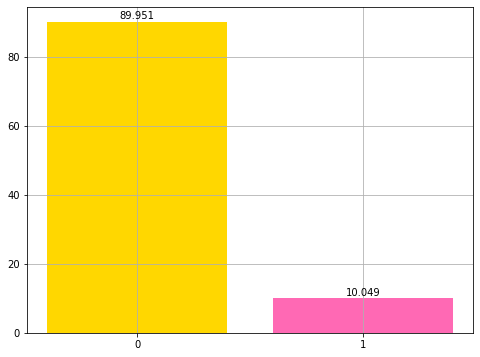

In [6]:
#target value distribution using matplotlib(bar chart)

plt.figure(figsize=(8,6))
names = ["0","1"]
values = train["target"].value_counts(normalize=True)*100 
bar_plot= plt.bar(names,values,color = ["gold","hotpink"])

#function to label the bars
def label_bars(bar_chart):
    for i in bar_plot:
        height = i.get_height()
        plt.text(i.get_x()+i.get_width()/2., 1.005*height,'%g'%(height),ha='center',va='bottom')
label_bars(bar_plot)
plt.grid()
plt.savefig("target value distribution")

## MISSING VALUE ANALYSIS

In [7]:
def find_missing_values(data_frame):
    # check for missing values and convert it into  dataframe
    df = pd.DataFrame(data_frame.isnull().sum())
    # rename columns of the dataframe
    df = df.rename(columns = {0:"Count"})
    # add a percentage variable
    df["Percentage"] = (df["Count"]/len(data_frame))*100
    # add a type variable to data types 
    df["Type"] = data_frame.dtypes
    # sorting values of the dataframe in descending order according to missing value count
    df = df.sort_values(by = "Count",ascending = False)
    # transpose for better readability
    df = df.transpose()
    return df

In [8]:
find_missing_values(train)

,ID_code,var_136,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,...,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_199
Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percentage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [9]:
find_missing_values(test)

,ID_code,var_137,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,...,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_199
Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percentage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Type,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


#### Observation
* We can notice that there are no missing values in both the Train and the Test Dataset.


In [10]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


#### Observations 

* standard deviation is relatively large for both train and test variable data.
* min, max, mean, sdt values for train and test data looks quite close. 
* mean values are distributed over a large range.
* The number of values in train and test set is the same. 

## VISUALIZATIONS

In [7]:
features = [a for a in train.columns if a not in ["ID_code","target"]]

### Distribution of Mean

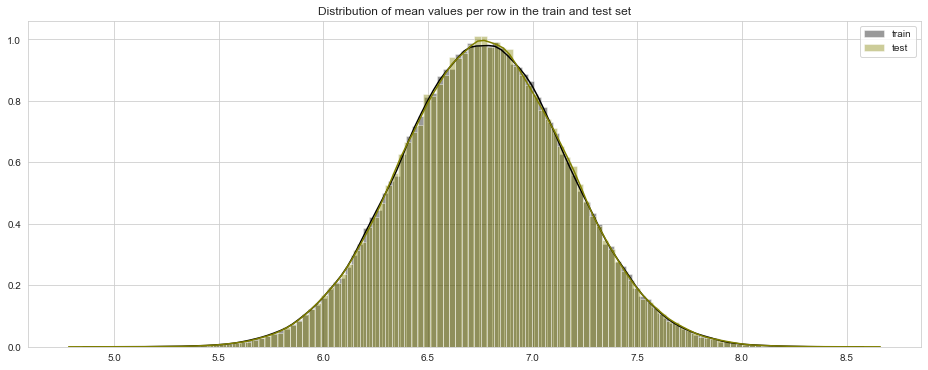

In [15]:

plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1), color="black",bins=120, label='train')
sns.distplot(test[features].mean(axis=1), color="olive",bins=120, label='test')
plt.legend();
plt.show()


<pre>Let's check the distribution of the mean of values per column in the train and test datasets.</pre>

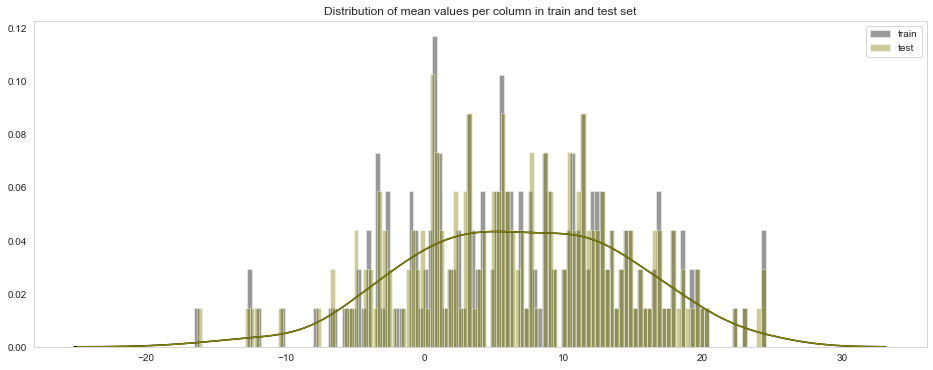

In [130]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in train and test set")
sns.distplot(train[features].mean(axis=0), color="black",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0), color="olive",kde=True,bins=120, label='test')
plt.legend()
plt.grid()

<pre>Let's check now the distribution of the mean values per row in the train dataset, grouped by value of target</pre>

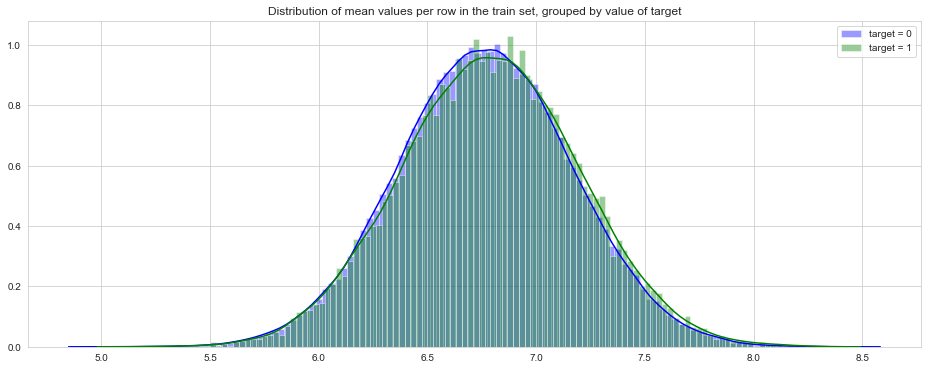

In [131]:
t0 = train.loc[train["target"] == 0]
t1 = train.loc[train["target"] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set, grouped by value of target")
sns.distplot(t0[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="green", kde=True,bins=120, label='target = 1')
plt.legend(); 
plt.show()

<pre>Let's check now the distribution of the mean values per column in the train dataset grouped by value of target</pre>

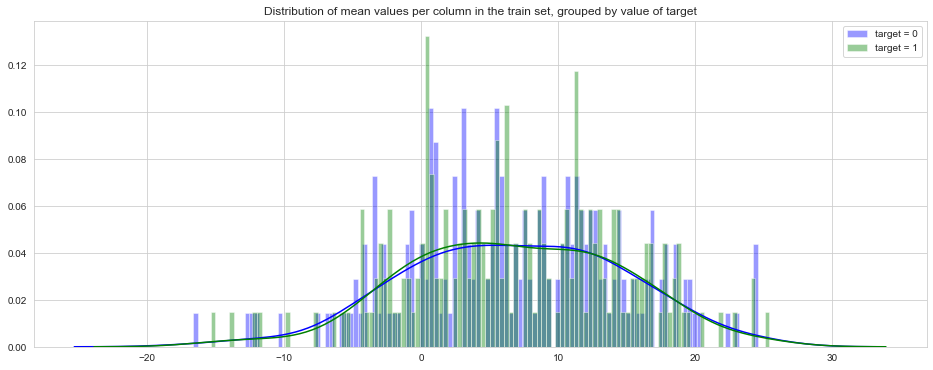

In [132]:
t0 = train.loc[train["target"] == 0]
t1 = train.loc[train["target"] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set, grouped by value of target")
sns.distplot(t0[features].mean(axis=0),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 1')
plt.legend(); 
plt.show()

#### Observations
 * Mean values of train and test set looks quite close
 * Mean values are distributed over a large range.

### Distribution of Standard Deviation

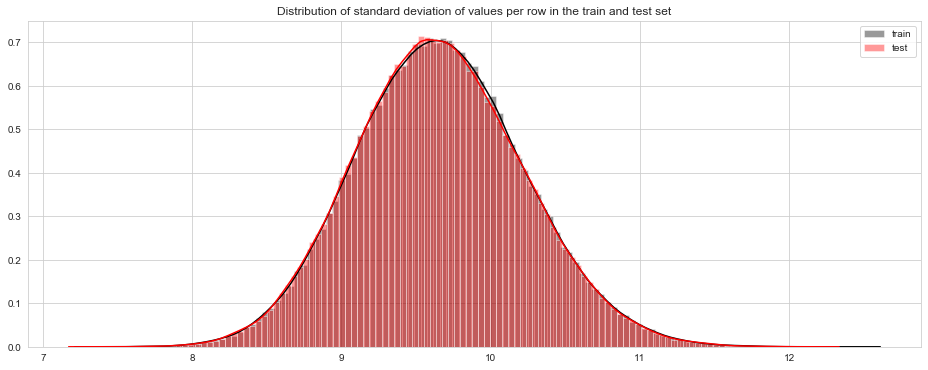

In [133]:
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation of values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="black",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend(); 
plt.show()

<pre>Let's check the distribution of the standard deviation of values per columns in the train and test datasets.</pre>

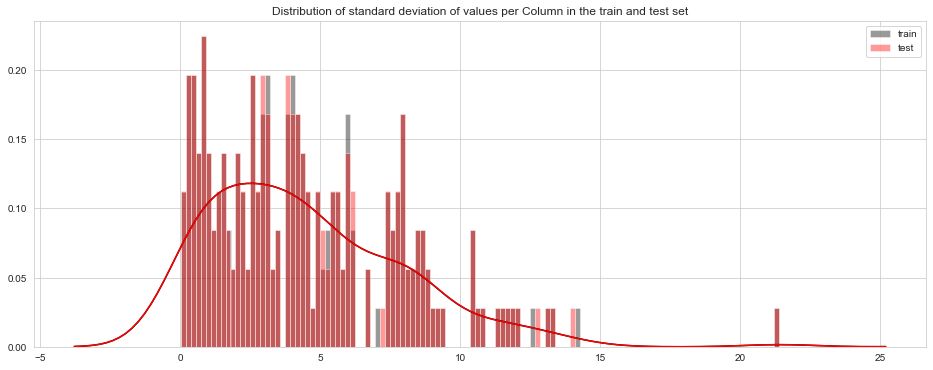

In [134]:
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation of values per Column in the train and test set")
sns.distplot(train[features].std(axis=0),color="black",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend(); 
plt.show()

<pre>Let's check now the distribution of the standard deviation  per row in the train dataset, grouped by value of target</pre>

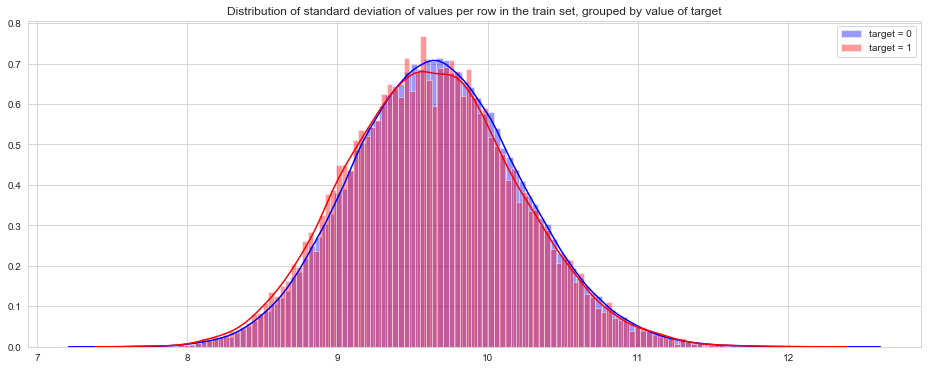

In [135]:
t0 = train.loc[train["target"] == 0]
t1 = train.loc[train["target"] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation of values per row in the train set, grouped by value of target")
sns.distplot(t0[features].std(axis=1),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=1),color="red", kde=True,bins=120, label='target = 1')
plt.legend(); 
plt.show()

<pre>Let's check now the distribution of the standard deviation  per column in the train dataset, grouped by value of target</pre>

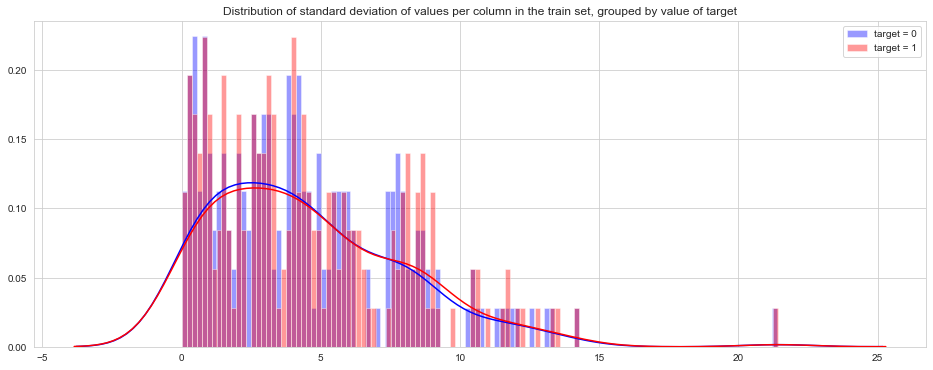

In [136]:
t0 = train.loc[train['target']  == 0]
t1 = train.loc[train["target"]  == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation of values per column in the train set, grouped by value of target")
sns.distplot(t0[features].std(axis=0),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=0),color="red", kde=True,bins=120, label='target = 1')
plt.legend(); 
plt.show()

#### Observations
 * Standard deviation is relatively large for both train and test variable data.
 * Standard deviation values for train and test data looks similar

### Distribution of Skewness

<pre>Let's see now the distribution of skewness  per row in the train and test dataset </pre>

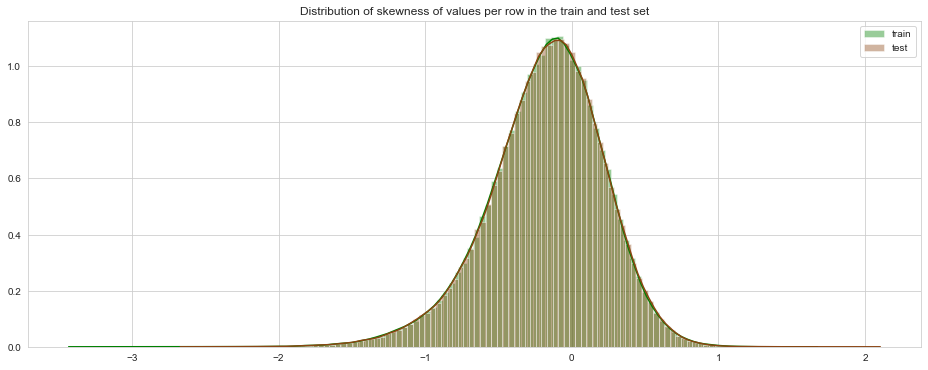

In [16]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skewness of values per row in the train and test set")
sns.distplot(train[features].skew(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=1),color="saddlebrown", kde=True,bins=120, label='test')
plt.legend(); 
plt.show()

<pre>Let's see now the distribution of skewness on columns in train and test dataset.</pre>

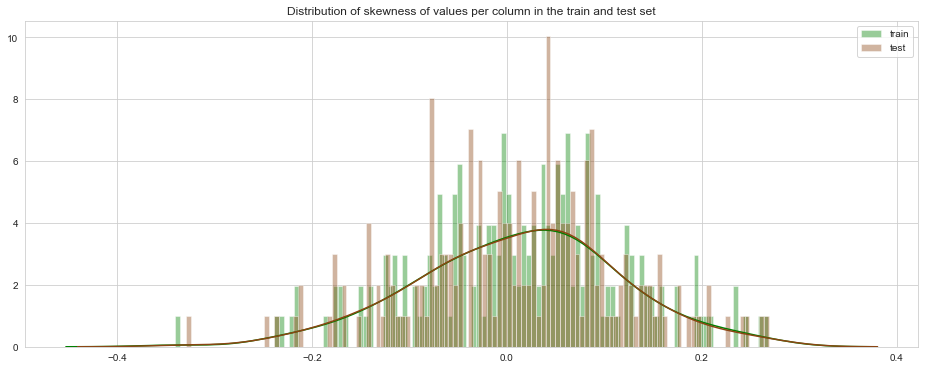

In [25]:
plt.figure(figsize=(16,6))
plt.title("Distribution of skewness of values per column in the train and test set")
sns.distplot(train[features].skew(axis=0),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].skew(axis=0),color="saddlebrown", kde=True,bins=120, label='test')
plt.legend(); 
plt.show()

#### Observation
* We found the distribution is left skewed 

### Distribution of Kurtosis

<pre>Let's see now the distribution of kurtosis per row in train and test dataset.</pre>

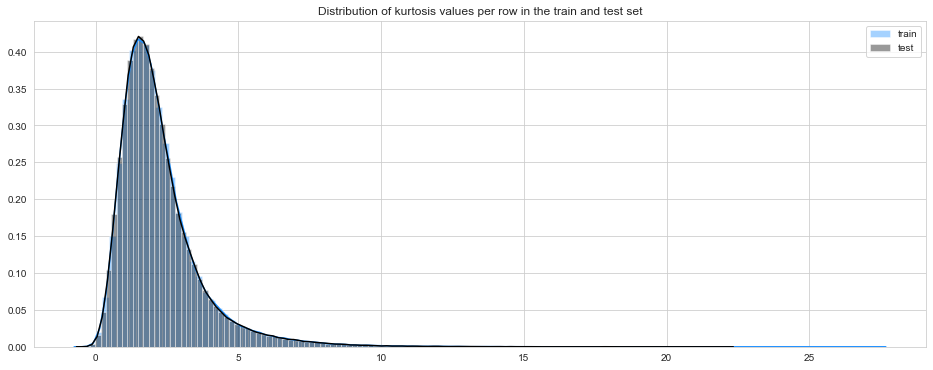

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per row in the train and test set")
sns.distplot(train[features].kurtosis(axis=1),color="dodgerblue", kde=True,bins=120, label='train')
sns.distplot(test[features].kurtosis(axis=1),color="black", kde=True,bins=120, label='test')
plt.legend(); 
plt.show()

<pre>Let's see now the distribution of kurtosis per column in train and test dataset.</pre>

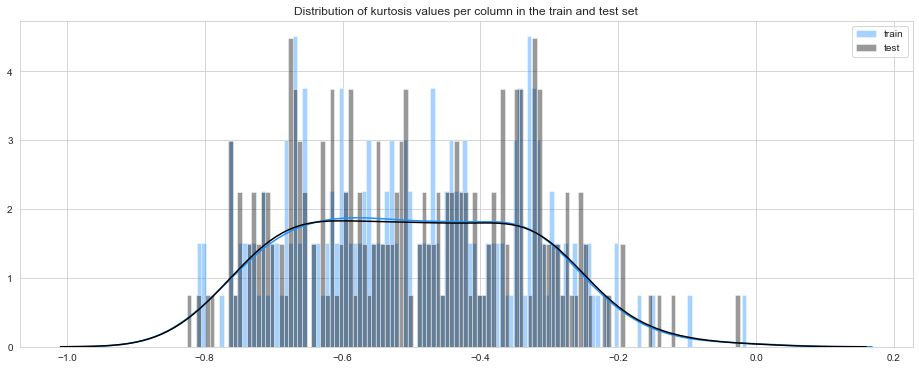

In [19]:
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per column in the train and test set")
sns.distplot(train[features].kurtosis(axis=0),color="dodgerblue", kde=True,bins=120, label='train')
sns.distplot(test[features].kurtosis(axis=0),color="black", kde=True,bins=120, label='test')
plt.legend(); 
plt.show()

#### Observation
* We found the distribution to be Leptokurtic which means heavy tails on either side indicating large outliers

### Distribution of Min and Max

<pre>Let's check the distribution of Min values per row in the train and test set.</pre>

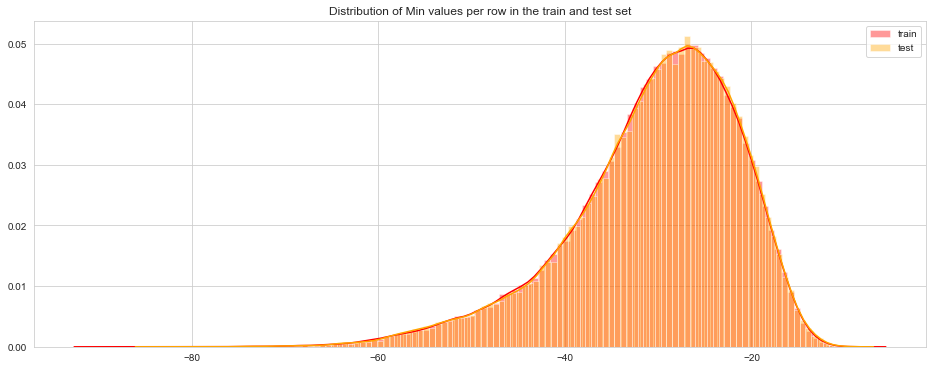

In [20]:
plt.figure(figsize=(16,6))
plt.title("Distribution of Min values per row in the train and test set")
sns.distplot(train[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend();
plt.show()

<pre>Let's now show the distribution of Min values per column in the train and test set.<pre>

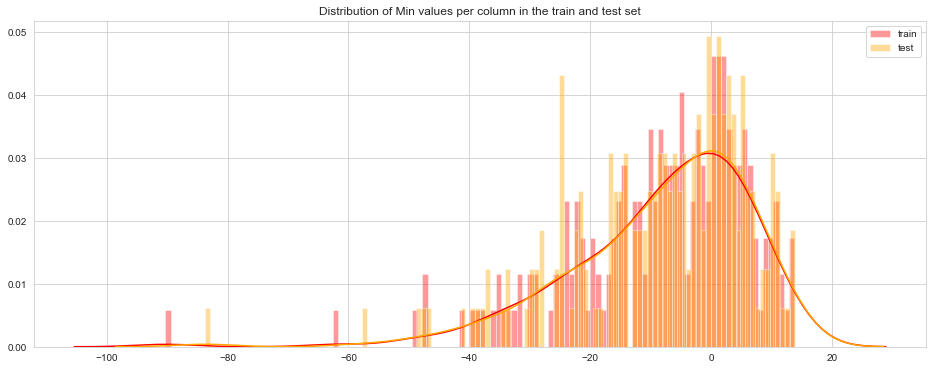

In [23]:
plt.figure(figsize=(16,6))
plt.title("Distribution of Min values per column in the train and test set")
sns.distplot(train[features].min(axis=0),color="red", kde=True,bins=120, label='train')
sns.distplot(test[features].min(axis=0),color="orange", kde=True,bins=120, label='test')
plt.legend();
plt.show()

<pre>Let's check now the distribution of Max values per row for train and test set. </pre>

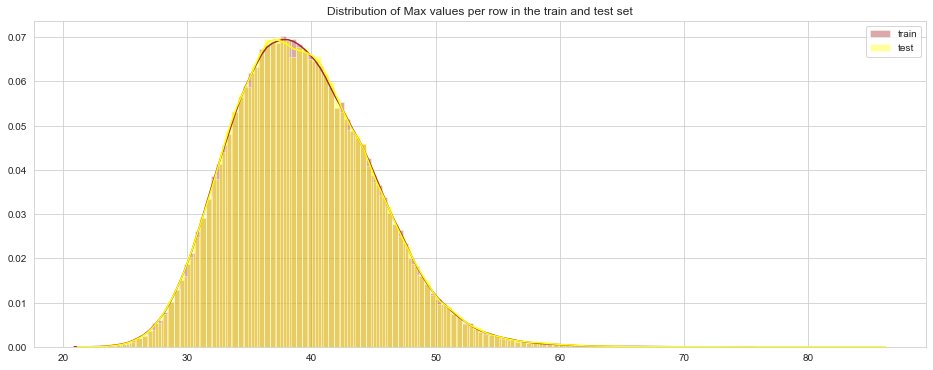

In [22]:
plt.figure(figsize=(16,6))
plt.title("Distribution of Max values per row in the train and test set")
sns.distplot(train[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend();
plt.show()

<pre>Let's check now the distribution of Max values per column for train and test set. </pre>

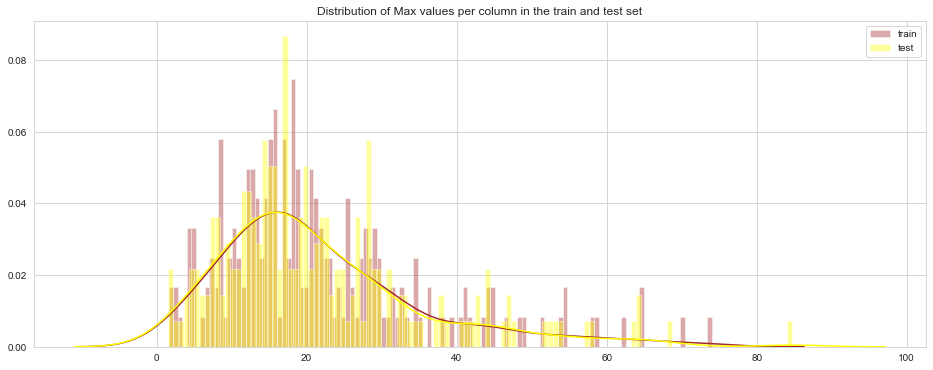

In [24]:
plt.figure(figsize=(16,6))
plt.title("Distribution of Max values per column in the train and test set")
sns.distplot(train[features].max(axis=0),color="brown", kde=True,bins=120, label='train')
sns.distplot(test[features].max(axis=0),color="yellow", kde=True,bins=120, label='test')
plt.legend();
plt.show()

#### Observation
* Min and Max values for train and test dataset looks almost identical
* We can see from above that all the variables have nearly same distribution with the same scales

## OUTLIER ANALYSIS

In [26]:
# function to plot multiple boxplots
def show_boxplot(df,feature):
    plt.figure(figsize = (18, 24))
    sns.set_style('whitegrid')
    for i in enumerate(feature):
        plt.subplot(10, 5,i[0]+1)
        sns.boxplot(i[1], data = df,color= "darksalmon")
        plt.xlabel(i[1],fontsize=11)
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)

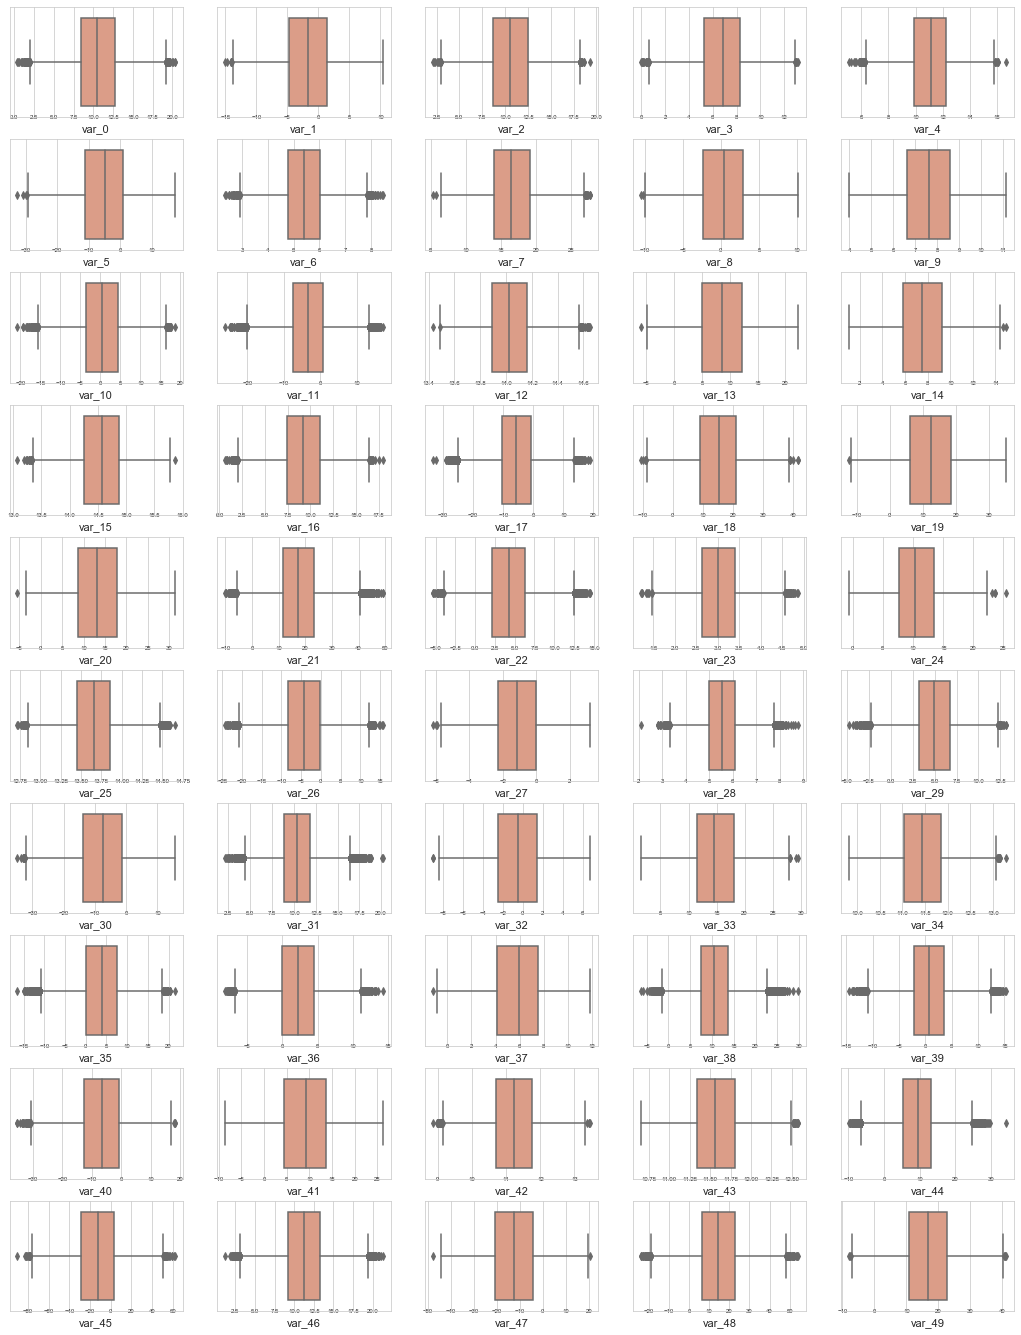

In [27]:
# From var_0 to var_49
features_2to52 = train.columns.values[2:52]
show_boxplot(train,features_2to52)


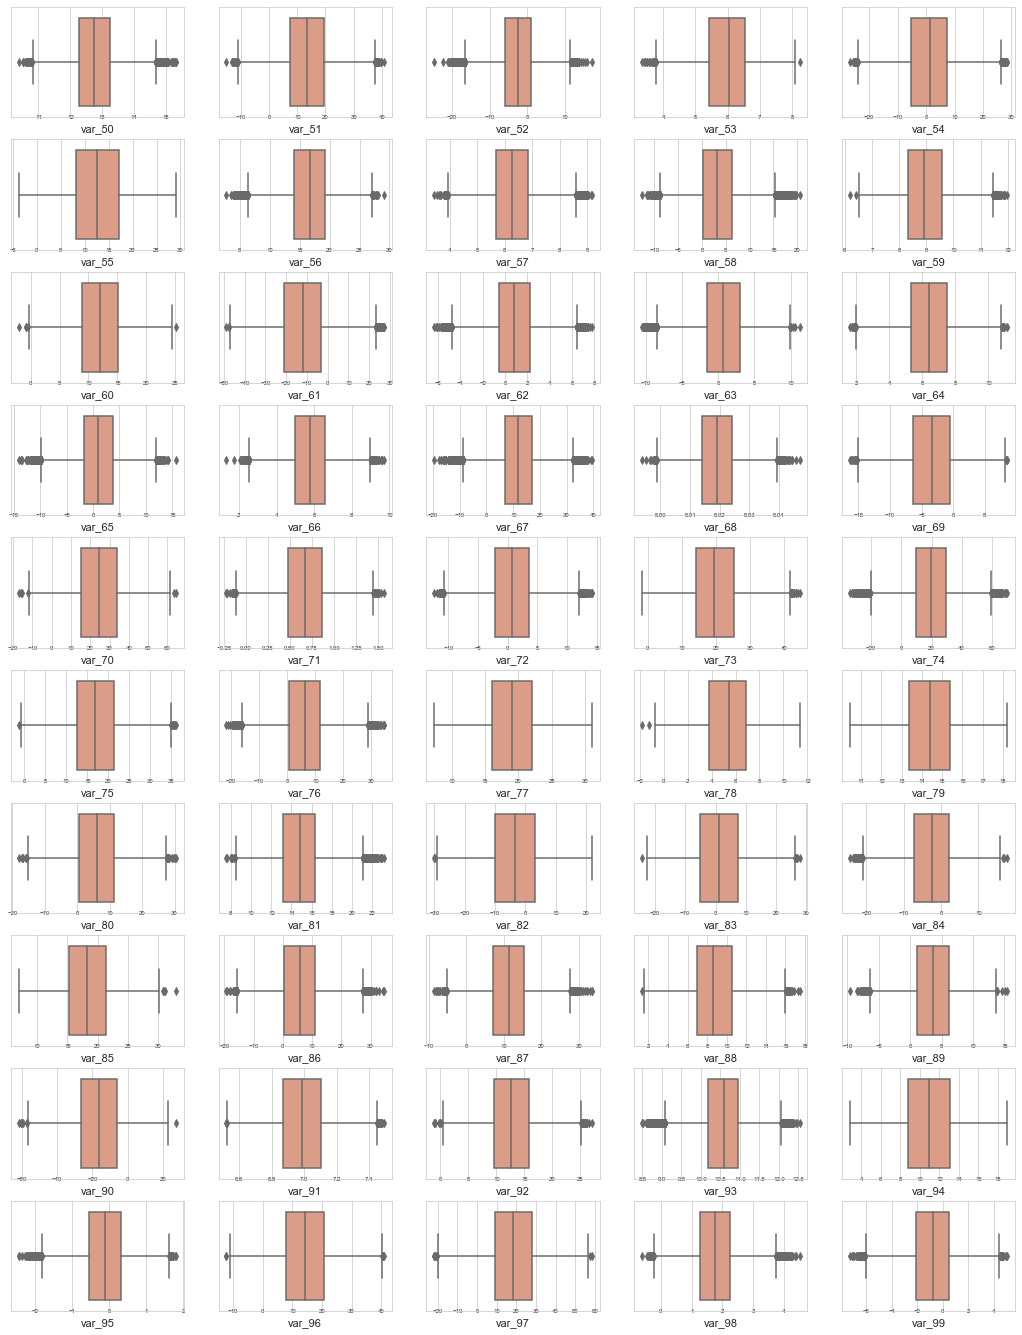

In [28]:
# From var_50 to var_99
features_52to102 = train.columns.values[52:102]
show_boxplot(train,features_52to102)


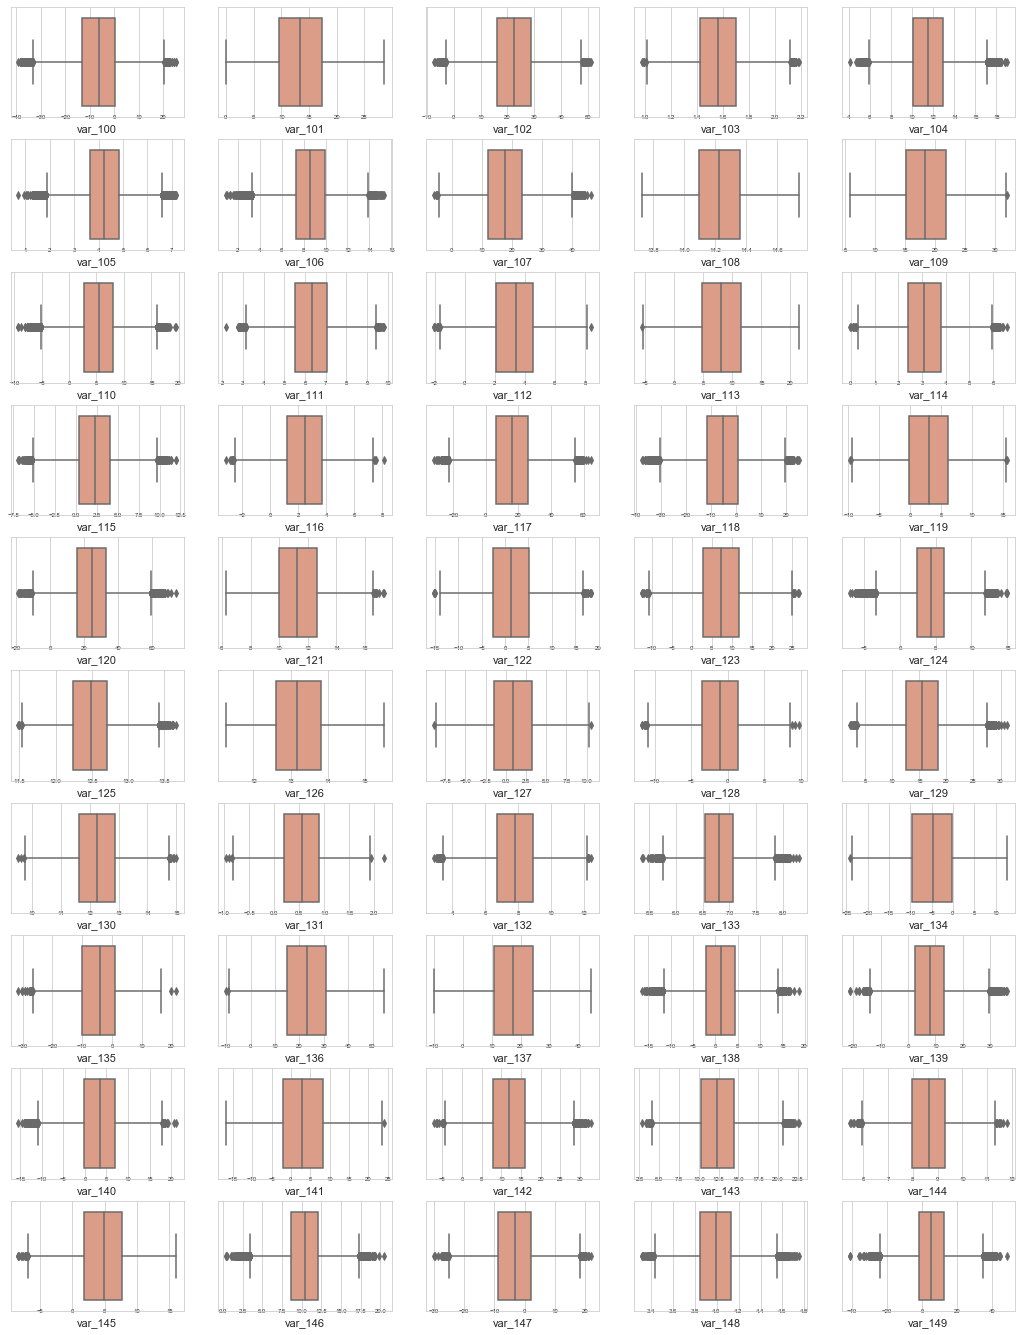

In [31]:
# From var_100 to var_149
features_102to152 = train.columns.values[102:152]
show_boxplot(train,features_102to152)


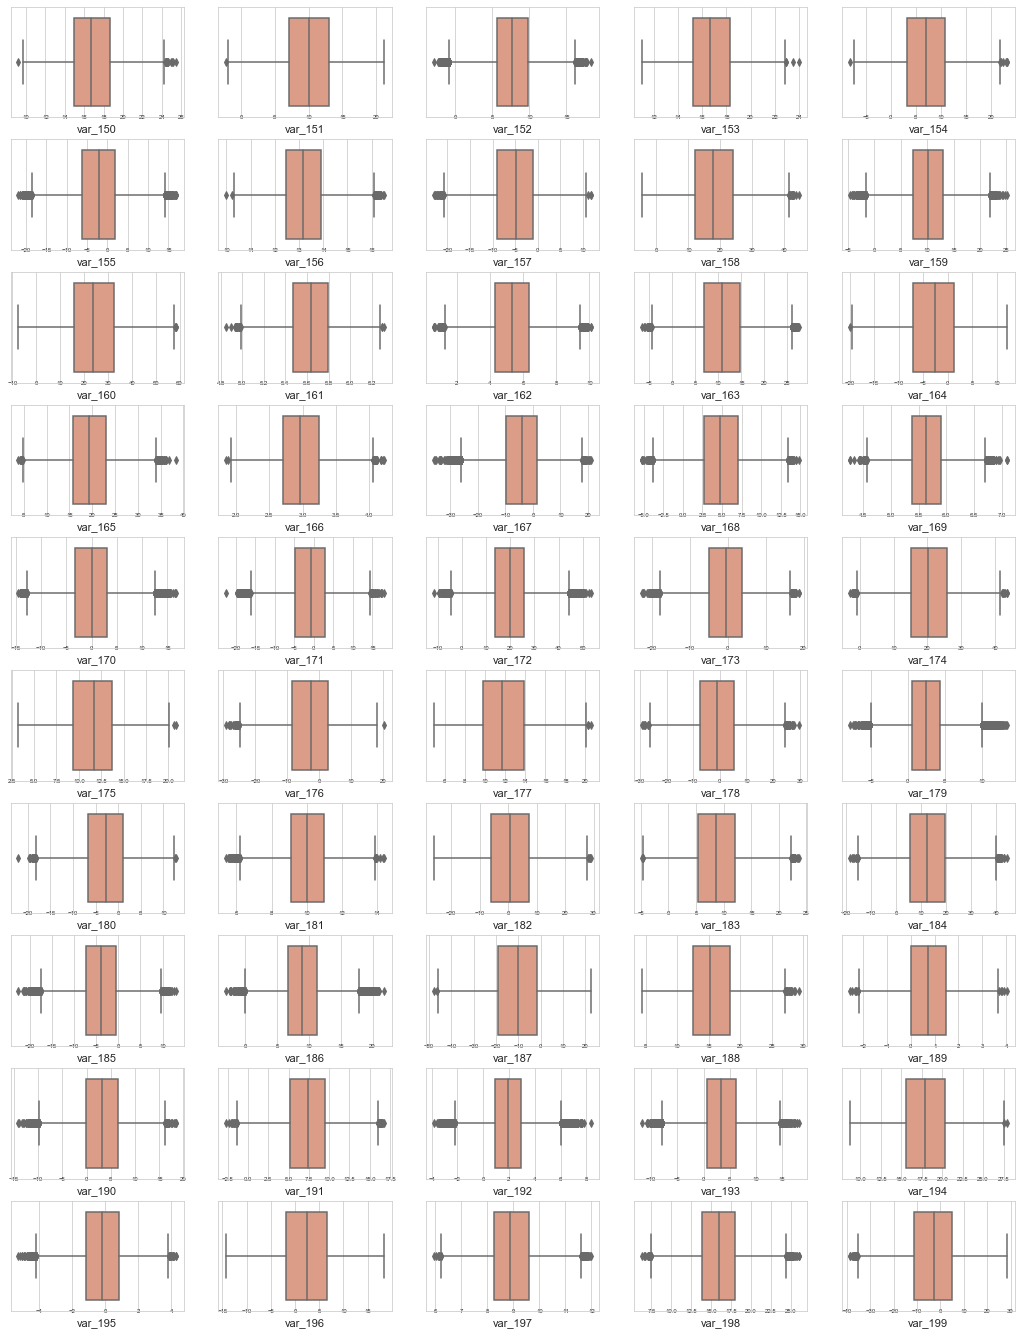

In [30]:
# From var_150 to var_199
features_152to202 = train.columns.values[152:202]
show_boxplot(train,features_152to202)


In [32]:
# #Detect from IQR and delete outliers from data
#iqr stands for inter quartile range
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train_in = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out = train[((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print("train_in.shape:",train_in.shape)
print("train_out.shape:",train_out.shape)
    

train_in.shape: (157999, 202)
train_out.shape: (42001, 202)


In [27]:
train_in['target'].value_counts()

0    157999
Name: target, dtype: int64

In [28]:
# comparing the 'train' and 'df_out' dataset,
# we can say that all the data points with target equals to 1 are present as outliers 
train_out['target'].value_counts()

0    21903
1    20098
Name: target, dtype: int64

In [29]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

#### Observation
* After separating outliers and inliers with IQR method we found that all the target variables with label as one are outliers.
* Outliers present in our data, are meaningful and thus can’t be removed.


## FEATURE SELECTION

### CORRELATION ANALYSIS

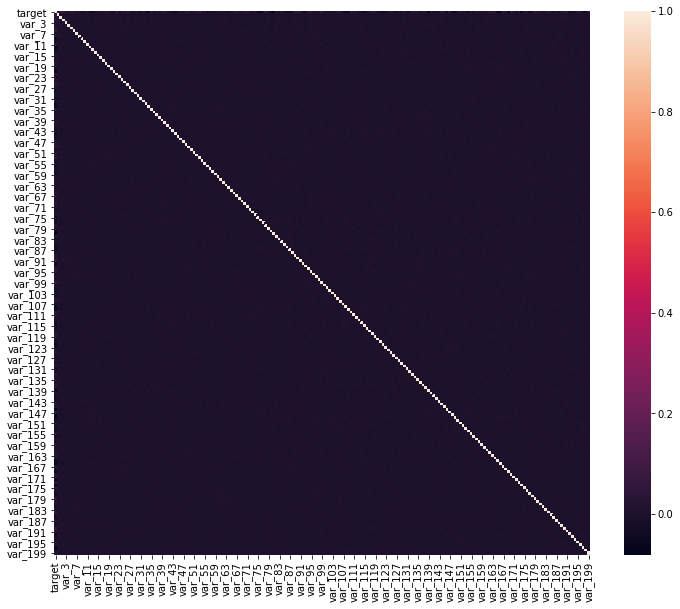

In [30]:
#Set the width and height of the plot
plt.subplots(figsize=(12, 10))


#Generate correlation matrix
corr = train.corr()

#Plot using seaborn library
sns.heatmap(corr);

In [31]:
corr

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


In [32]:
(corr['target']).sort_values(ascending=False).head(50)

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
var_1      0.050343
var_179    0.050002
var_40     0.049530
var_184    0.048315
var_78     0.048245
var_170    0.047973
var_191    0.047114
var_94     0.046296
var_67     0.044673
var_18     0.043479
var_173    0.042022
var_164    0.040997
var_118    0.040358
var_147    0.040280
var_91     0.040127
var_89     0.039369
var_95     0.038531
var_155    0.037240
var_35     0.036567
var_71     0.033607
var_106    0.032947
var_162    0.032647
var_157    0.032642
var_48     0.032334
var_163    0.031811
var_180    0.031190
var_5      0.030979
var_119    0.030975
var_145    0.030917
var_167    0.030797
var_49     0.030612
var_32     0.030513
var_130    0.029917
var_90     0.029395
var_24     0.028477
var_195    0.028285
var_125    0.028223
var_135    0.027944
var_52     0.027754


In [33]:
correlation = train[features].corr().abs().unstack().sort_values().reset_index()
correlation = correlation[correlation['level_0'] != correlation['level_1']]
correlation.tail(10)

,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


In [34]:
# Another Method to compute the correlation matrix and find out +vely and -vely correlated features

corr1 = train[features].corr()
np.fill_diagonal(corr1.values,np.nan)
corr1.max().max(),corr1.min().min()

(0.009713658349534146, -0.009844361358419677)

#### Observation
- The  features are independent and not correlated to each other

## DIMENSIONALITY REDUCTION

### Principal component analysis (PCA)

- PCA is a dimensionality reduction technique that reduces less-informative 'noise' features. 
- But PCA is sensitive to variance and different scales, so standardizing will help PCA perform better.


In [35]:
# At this point of time we should check for among 200 features which variables are useful for us.
# As the features are anonymous. This can be done by using PCA
# However, since we found that the correlation between different features in the training dataset is not that significant, so using PCA might not be meaningful
# scale the data before using PCA

scaler = StandardScaler()
X_train = scaler.fit_transform(train[features])
X_test = scaler.transform(test[features])

In [42]:
pca = PCA()  
a = pca.fit_transform(X_train) 
b = pca.transform(X_test)


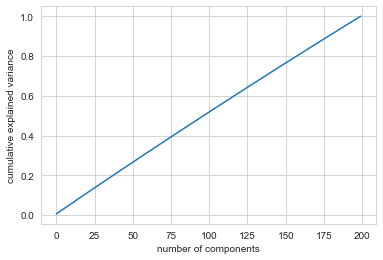

In [43]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(200),np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Observation
* the line of cumulative sums of explained variance ratio when you PCA the data set, it is indicative of a dataset that has already undergone PCA (get straight line ie y=x).
* Since PCA hasn't been useful, We decided to proceed with the existing dataset with all 200 variables.

## MODELLING

In [4]:
# Splitting the train and test data
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(columns = ['target', 'ID_code'])
test_inp = test.drop(columns = ['ID_code'])



In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_inp, Target, test_size=0.2, random_state = 42)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

X_train:  (160000, 200)
y_train:  (160000,)
X_test:  (40000, 200)
y_test:  (40000,)


In [7]:
## Created a Model function for modeling with confusion matrix and classification report
def model(model,features_train,labels_train,features_test,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("The Accuracy of this model : ",accuracy_score(labels_test,pred)*100 )
    print("the Recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("the Precision for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
    fig= plt.figure(figsize=(10,7))
    print("TP",cnf_matrix[1,1]) # no of true transactions which are predicted as true 
    print("TN",cnf_matrix[0,0]) # no of false transaction which are predicted as false 
    print("FP",cnf_matrix[0,1]) # no of false transactions which are predicted as true
    print("FN",cnf_matrix[1,0]) # no of true transactions which are predicted as false 
    sns.heatmap(cnf_matrix,cmap="Greens",annot=True,fmt="d",linewidths=1,linecolor='black')
    plt.title("Confusion Matrix\n")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.show()
    print("\n---------------Classification Report----------------\n")
    print(classification_report(labels_test,pred))

#### Logistic Regression
- We start with most basic algorithm used for classification problems. 
- Since this is an unbalanced dataset, we need to define parameter 'class_weight = balanced' which will give equal weights to both the targets irrespective of their representation in the training dataset. 


The Accuracy of this model :  77.8925
the Recall for this model is : 0.7720283134000488
the Precision for this model is : 0.2856755780346821
TP 3163
TN 27994
FP 7909
FN 934


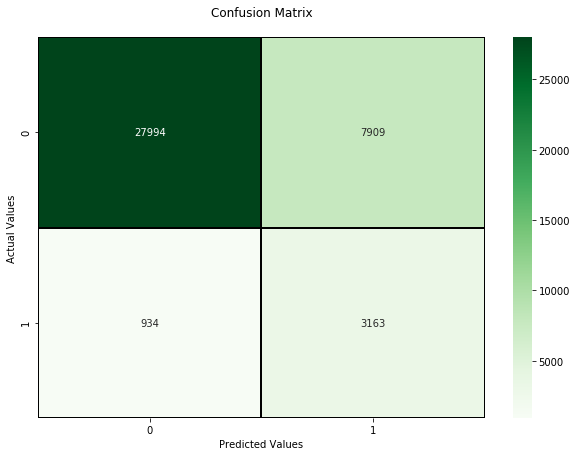


---------------Classification Report----------------

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     35903
           1       0.29      0.77      0.42      4097

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



In [8]:
model(LogisticRegression(class_weight='balanced',max_iter=10000),X_train,y_train, X_test,y_test)

In [9]:
logreg_scaled = LogisticRegression(class_weight='balanced',max_iter=10000).fit(X_train,y_train)

y_pred = logreg_scaled.predict_proba(X_test)[:,1]

In [11]:
#Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced
def plot_precision_recall(y_test, y_pred): 
    precision, recall, threshold = precision_recall_curve(y_test, y_pred)
    plt.step(recall, precision, color='b', alpha=0.3,where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # set the y range
    plt.ylim([0.0, 1.05])
    # set the x raneg
    plt.xlim([0.0, 1.0])
    plt.title(' Precision-Recall curve: PR_AUC={0:0.3f}'.format( auc(recall, precision)))
    plt.grid()


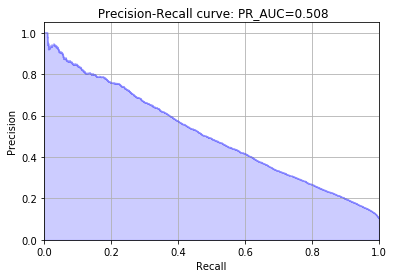

In [12]:
plot_precision_recall(y_test, y_pred)

In [14]:
def plot_roc_curve(fpr, tpr):  
    fig= plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve: ROC_AUC={0:0.5f}'.format(roc_auc_score(y_test, y_pred)))
    plt.legend()
    plt.show()

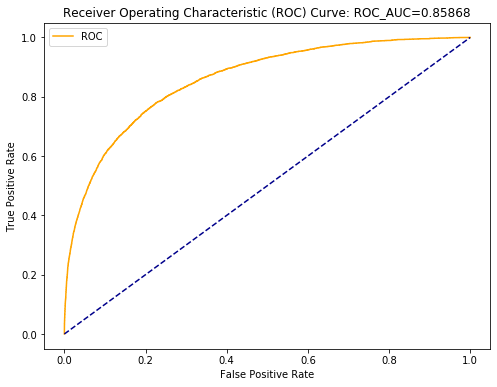

In [15]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred) 
plot_roc_curve(fpr, tpr) 

### Decision Trees
- Moving on to a slightly advanced algorithm, decision trees. Again, the parameters here are class_weight to deal with unbalanced target variable, random_state for reproducability of same trees. The feature max_features and min_sample_leaf are used to prune the tree and avoid overfitting to the training data.

- Max_features defines what proportion of available input features will be used to create tree.

- Min_sample_leaf restricts the minimum number of samples in a leaf node, making sure none of the leaf nodes has less than 80 samples in it. By dafault it takes value "1".If leaf nodes have less samples it implies we have grown the tree too much and trying to predict each sample very precisely, thus leading to overfitting.

In [17]:
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 42, 
                                  max_features = 0.7, min_samples_leaf = 80)

In [18]:
tree_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

The Accuracy of this model :  65.13
the Recall for this model is : 0.5643153526970954
the Precision for this model is : 0.15972366148531952
TP 2312
TN 23740
FP 12163
FN 1785


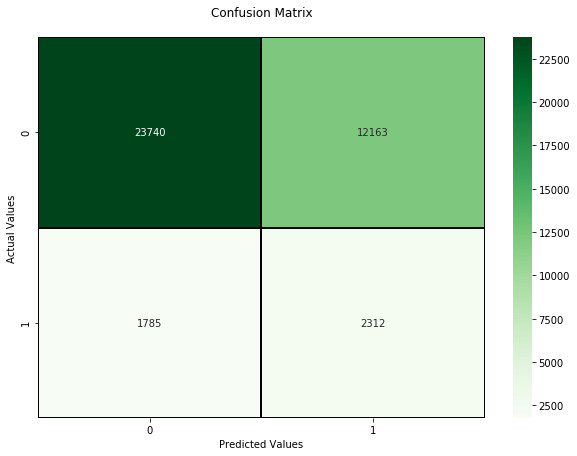


---------------Classification Report----------------

              precision    recall  f1-score   support

           0       0.93      0.66      0.77     35903
           1       0.16      0.56      0.25      4097

    accuracy                           0.65     40000
   macro avg       0.54      0.61      0.51     40000
weighted avg       0.85      0.65      0.72     40000



In [19]:
model(tree_clf,X_train, y_train,X_test, y_test)

In [20]:
y_pred= tree_clf.predict_proba(X_test)[:, 1]

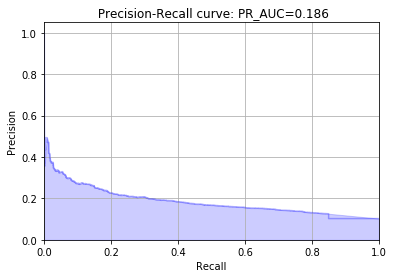

In [21]:
plot_precision_recall(y_test, y_pred)

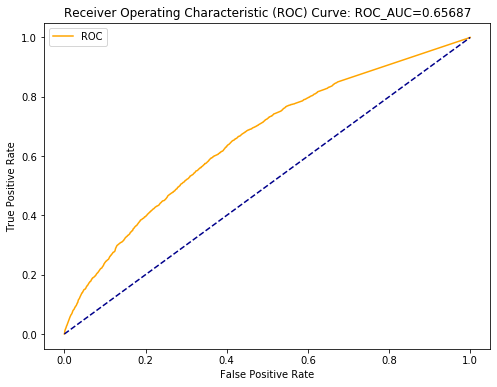

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

### Light Gradient Boosting Method

WHAT IS IT?

- Light GBM is a gradient boosting framework that uses tree based learning algorithm. It grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

WHY USE LGB?

- It is ‘Light’ because of its high speed. It can handle large data, requires low memory to run and focuses on accuracy of results. 

In [24]:
lgb_clf= lgb.LGBMClassifier()

In [25]:
lgb_clf

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

The Accuracy of this model :  90.5475
the Recall for this model is : 0.09177446912374908
the Precision for this model is : 0.8623853211009175
TP 376
TN 35843
FP 60
FN 3721


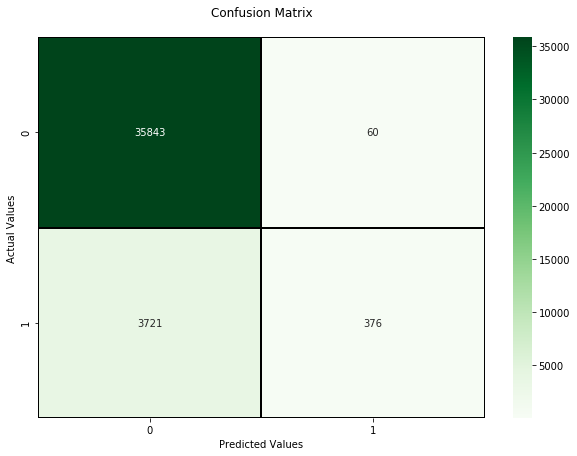


---------------Classification Report----------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35903
           1       0.86      0.09      0.17      4097

    accuracy                           0.91     40000
   macro avg       0.88      0.55      0.56     40000
weighted avg       0.90      0.91      0.87     40000



In [26]:
model(lgb_clf,X_train, y_train,X_test, y_test)

In [28]:
y_pred= lgb_clf.predict_proba(X_test)[:, 1]

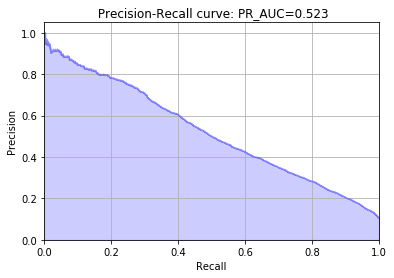

In [29]:
plot_precision_recall(y_test, y_pred)

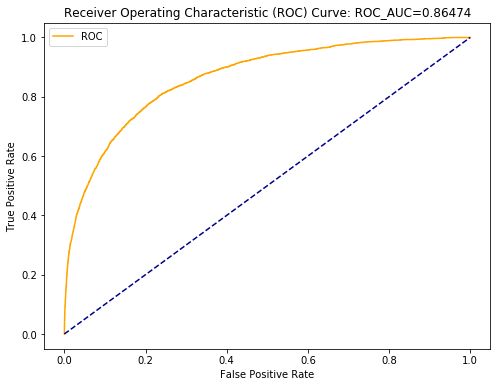

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

#### Observation
* LightGBM is best choice for identifying which customers will make a specific
  transaction in the future, irrespective of the amount of money transacted.
